In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
df_orig = pd.read_csv("./data/housing.csv")

In [3]:
df_orig.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df_orig.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


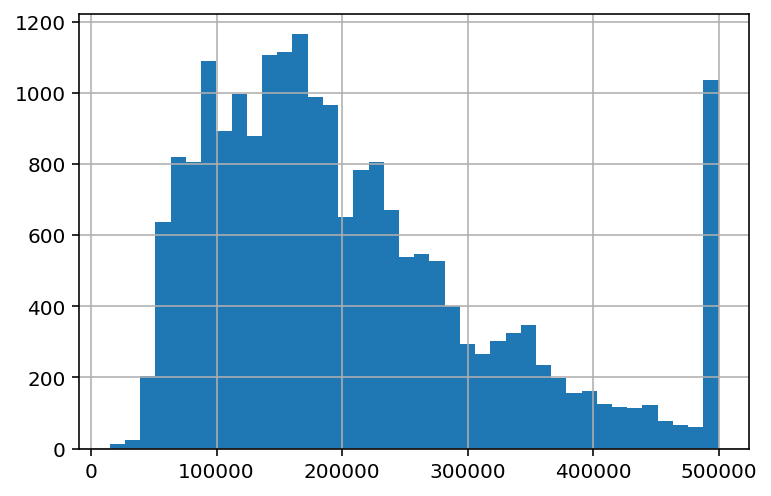

In [5]:
df_orig.median_house_value.hist(bins=40);

In [6]:
cols = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']

In [7]:
print("Before selecting the columns: ", df_orig.columns.values)
df_orig = df_orig[cols]
print("After selecting the columns: ", df_orig.columns.values)

Before selecting the columns:  ['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income'
 'median_house_value' 'ocean_proximity']
After selecting the columns:  ['latitude' 'longitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income'
 'median_house_value']


---
### Question 1

Find a feature with missing values. How many missing values does it have?
- 207
- 307
- 408
- 508
---

In [8]:
df_orig.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

---
### Question 2

What's the median (50% percentile) for variable 'population'?
- 1133
- 1122
- 1166
- 1188
---

In [9]:
df_orig.population.median()

1166.0

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64


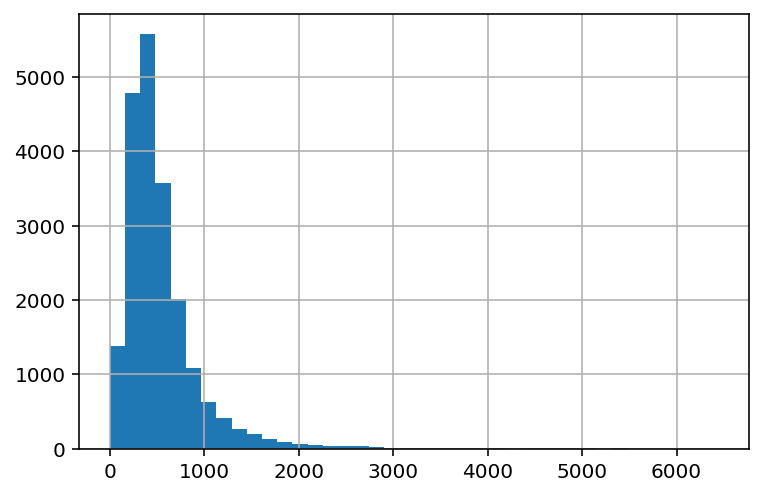

In [10]:
print(df_orig.total_bedrooms.describe())
df_orig.total_bedrooms.hist(bins=40);

---
### Split the data

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('median_house_value') is not in your dataframe.
* Apply the log transformation to the median_house_value variable using the `np.log1p()` function.
---

In [11]:
df = df_orig.copy()
np.random.seed(42);
idx = np.arange(len(df))
np.random.shuffle(idx)
df = df.iloc[idx,:]
df_len = df.shape[0];

In [12]:
idx_tv = int(0.6 * df_len)
idx_tt = int(0.8 * df_len)
train_size = idx_tv
valid_size = idx_tt - idx_tv
test_size = df_len - idx_tt
assert train_size + valid_size + test_size == df_len, "Error"

In [13]:
df["median_house_value"] = np.log1p(df["median_house_value"])

df_train = df.iloc[ : idx_tv]
df_valid = df.iloc[idx_tv : idx_tt]
df_test  = df.iloc[idx_tt : ]

In [14]:
df_list = [df_train, df_valid, df_test]
y_train, y_valid, y_test = np.zeros(len(df)), np.zeros(len(df)), np.zeros(len(df))
y_list = [y_train, y_valid, y_test]

def drop_targets(df_list, y_list):
    df_new = []
    y_new = []
    for df_x, y_df in zip(df_list, y_list):
        y_df = df_x.median_house_value.values
        df_x = df_x.drop(["median_house_value"], axis=1)
        df_new.append(df_x)
        y_new.append(y_df)
    return df_new, y_new
        
df_list_new, y_list_new = drop_targets(df_list, y_list)

In [15]:
df_list_new[0].head(3)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20046,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812
3024,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313
15663,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801


In [16]:
y_list_new[0]

array([10.77270764, 10.7320612 , 13.12236738, ..., 11.89683321,
       11.93032573, 12.9487264 ])

In [17]:
df_train, df_valid, df_test = df_list_new
y_train, y_valid, y_test = y_list_new

In [18]:
y_train.shape, y_train[:5]

((12384,),
 array([10.77270764, 10.7320612 , 13.12236738, 12.29500343, 12.53537999]))

In [19]:
y_valid.shape, y_valid[:5]

((4128,),
 array([11.4414402 , 12.15162174, 12.74081302, 12.16055736, 12.58485491]))

In [20]:
y_test.shape, y_test[:5]

((4128,),
 array([10.98191414, 12.01854355, 11.84510995, 11.58525543, 11.58246086]))

---
### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:
- With 0
- With mean
- Both are equally good
---

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [22]:
model = LinearRegression()
model.fit(df_train.fillna(0), y_train)

LinearRegression()

In [23]:
y_train_pred = model.predict(df_train.fillna(0))
print("Training Error for null replaced with zeros: ")
round(np.sqrt( mean_squared_error(y_train, y_train_pred)), 2)

Training Error for null replaced with zeros: 


0.34

In [24]:
y_valid_pred = model.predict( df_valid.fillna(0) )
print("Validation Error for nulls replaced with zeros: ")
round(np.sqrt( mean_squared_error(y_valid, y_valid_pred)), 2)

Validation Error for nulls replaced with zeros: 


0.33

In [25]:
y_test_pred = model.predict( df_test.fillna(0) )
print("Test Error for nulls replaced with zeros: ")
round( np.sqrt( mean_squared_error(y_test, y_test_pred)), 2)

Test Error for nulls replaced with zeros: 


0.35

In [26]:
model2 = LinearRegression()
model2.fit(df_train.fillna(df_train.mean()), y_train)

LinearRegression()

In [27]:
y_train_pred = model2.predict( df_train.fillna(df_train.mean()) )
print("Training Error for nulls replaced with the mean values: ")
round( np.sqrt(mean_squared_error(y_train, y_train_pred)), 2)

Training Error for nulls replaced with the mean values: 


0.34

In [28]:
y_valid_pred = model2.predict( df_valid.fillna(df_train.mean()) )
print("Validation Error for nulls replaced with the mean values: ")
round(np.sqrt(mean_squared_error(y_valid, y_valid_pred)), 2)

Validation Error for nulls replaced with the mean values: 


0.33

In [29]:
y_test_pred = model2.predict( df_test.fillna(df_train.mean()) )
print("Test Error for nulls replaced with the mean values: ")
round(np.sqrt( mean_squared_error(y_test, y_test_pred)), 2)

Test Error for nulls replaced with the mean values: 


0.35

---
Linear Regression:
Using our own matrix operation functions using numpy

---

In [30]:
def linear_regression(X, w, w0):
    """
    Inputs: 
    X        : Input matrix of m x (n+1) bias included.
    w, w0    : w is the feature weights vector of length n+1, w0 is the bias term at index 0.
    """
    return w0 + X.dot(w)

In [31]:
def train_linear_regression(X, y):
    """
    Inputs:
    X: Input 2D array of shape m (samples) x n (features)
    y: Target feature
    
    Outputs:
    A tuple of weights: 
    1st term: bias term w_o, 
    2nd term: Weights corresponding to the <n> features
    """
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]
    

In [32]:
df_train.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

Filling the `Nulls` with the value zero `0`:

In [33]:
# Convert to a 2D array
X_train = df_train.fillna(0).values
w0, w = train_linear_regression(X_train, y_train)

In [34]:
y0_pred_train = linear_regression(X=X_train, w=w, w0=w0)

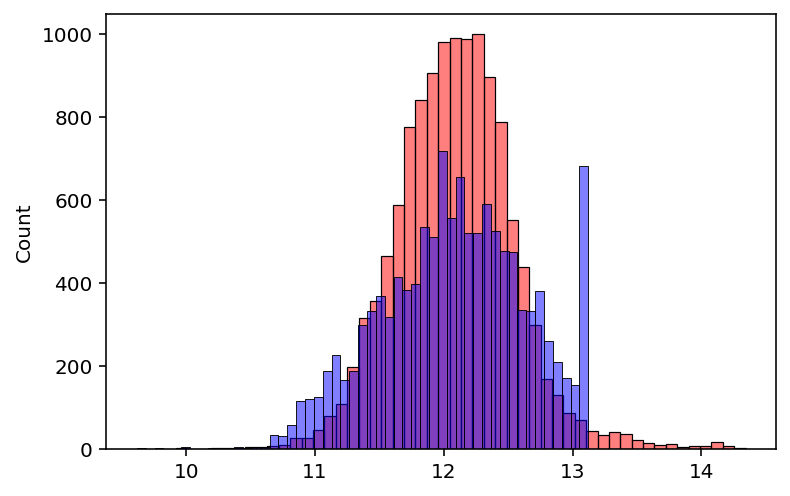

In [35]:
sns.histplot(y0_pred_train, color= 'red', bins=50, alpha=0.5);
sns.histplot(y_train, color = 'blue', alpha = 0.5);

In [36]:
def RMSE(y_actual, y_pred):
    """
    Calculates the root mean square error between the actual target (y) and prediction (y_pred) vectors.
    """
    residual = y_actual - y_pred
    return np.sqrt( np.mean( np.square(residual) ) )

In [37]:
print('Training Error with Nulls filled with zeros : ')
round(RMSE(y_train, y0_pred_train), 2)

Training Error with Nulls filled with zeros : 


0.34

In [38]:
X_valid = df_valid.fillna(0).values
y0_pred_valid = linear_regression(X=X_valid, w=w, w0=w0)  # We use the same weights here.
print('Validation Error with NA filled with Zeros : ')
round(RMSE(y_actual=y_valid, y_pred=y0_pred_valid),2)

Validation Error with NA filled with Zeros : 


0.33

In [39]:
X_test = df_test.fillna(0).values
y0_pred_test = linear_regression(X=X_test, w=w, w0=w0)  # We use the same weights here.
print('Test Error with NA filled with Zeros : ')
round(RMSE(y_actual=y_test, y_pred=y0_pred_test),2)

Test Error with NA filled with Zeros : 


0.35

Filling the `Nulls` with the mean values of training data:

In [40]:
y_mean_pred_train = linear_regression(X=df_train.fillna(df_train.mean()).values, w=w, w0=w0)
y_mean_valid_pred = linear_regression(X=df_valid.fillna(df_train.mean()).values, w=w, w0=w0)
y_mean_test_pred = linear_regression(X=df_test.fillna(df_train.mean()).values, w=w, w0=w0)

print('Train Error with NA filled with the training data''s mean values : ')
print(round(RMSE(y_train, y_mean_pred_train), 2))
print('Validation Error with NA filled with the training data''s mean values : ')
print(round(RMSE(y_valid, y_mean_valid_pred),2))
print('Test Error with NA filled with the training data''s mean values : ')
print(round(RMSE(y_test, y_mean_test_pred),2))

Train Error with NA filled with the training datas mean values : 
0.34
Validation Error with NA filled with the training datas mean values : 
0.33
Test Error with NA filled with the training datas mean values : 
0.35


* In both sklearn and our own calculations, the validation and test scores decreased negligibly as we switched to the mean value filling. However, using round(rmse, 2) they are the same.

---
### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:
- 0
- 0.000001
- 0.001
- 0.0001
---

In [41]:
def train_linear_regression_reg(X, y, r=0.001):
    """
    Inputs:
    X: Input 2D array of shape m x n (samples x features)
    y: Target feature
    r: Regularization parameter
    
    Outputs:
    A tuple of weights: 
    1st term: bias term w_o, 
    2nd term: Weights corresponding to the <n> features
    """
    n_row = X.shape[0]
    n_col = X.shape[1]
    ones = np.ones(n_row)
    X = np.column_stack([ones, X])  # Shape is (m x n+1)
    
    XTX = X.T.dot(X) + r * np.eye(n_col + 1) # +1 for the bias
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [42]:
reg_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
train_scores = {}
valid_scores = {}
test_scores = {}

for r_val in reg_values:
    X_train = df_train.fillna(0).values
    w0, w = train_linear_regression_reg(X_train, y_train, r = r_val)
    y_pred_train = linear_regression(X=df_train.fillna(0).values, w=w, w0=w0)
    y_valid_pred = linear_regression(X=df_valid.fillna(0).values, w=w, w0=w0)
    y_test_pred = linear_regression(X=df_test.fillna(0).values, w=w, w0=w0)
    train_scores["%s" %r_val] = np.round(RMSE(y_train, y_pred_train), 2)
    valid_scores["%s" %r_val] = np.round(RMSE(y_valid, y_valid_pred), 2)
    test_scores["%s" %r_val] = np.round(RMSE(y_test, y_test_pred), 2)


In [43]:
print(valid_scores)

{'0': 0.33, '1e-06': 0.33, '0.0001': 0.33, '0.001': 0.33, '0.01': 0.33, '0.1': 0.33, '1': 0.33, '5': 0.34, '10': 0.34}


In [44]:
print(train_scores)

{'0': 0.34, '1e-06': 0.34, '0.0001': 0.34, '0.001': 0.34, '0.01': 0.34, '0.1': 0.34, '1': 0.35, '5': 0.35, '10': 0.35}


In [45]:
print(test_scores)

{'0': 0.35, '1e-06': 0.35, '0.0001': 0.35, '0.001': 0.35, '0.01': 0.35, '0.1': 0.35, '1': 0.36, '5': 0.36, '10': 0.36}


---
### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

Options:
- 0.16
- 0.00005
- 0.005
- 0.15555
---

In [46]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = {}

for s in seeds:
    np.random.seed(s)
    idx = np.arange(len(df))
    np.random.shuffle(idx)
    df = df.iloc[idx,:]
    df_len = df.shape[0];
    idx_tv = int(0.6 * df_len)
    idx_tt = int(0.8 * df_len)
    train_size = idx_tv
    valid_size = idx_tt - idx_tv
    test_size = df_len - idx_tt
    
    df_train = df.iloc[ : idx_tv]
    df_valid = df.iloc[idx_tv : idx_tt]
    df_test  = df.iloc[idx_tt : ]
    
    df_list = [df_train, df_valid, df_test]
    y_train, y_valid, y_test = np.zeros(len(df)), np.zeros(len(df)), np.zeros(len(df))
    y_list = [y_train, y_valid, y_test]
    
    df_list_new, y_list_new = drop_targets(df_list, y_list)
    
    df_train, df_valid, df_test = df_list_new
    y_train, y_valid, y_test = y_list_new
    
    X_train = df_train.fillna(0).values
    w0, w = train_linear_regression(X_train, y_train)
    
    X_valid = df_valid.fillna(0).values
    y_pred_valid = linear_regression(X=X_valid, w=w, w0=w0)  # We use the same weights here.
    rmse_scores["%s" %s] = RMSE(y_actual=y_valid, y_pred=y_pred_valid)
    

In [47]:
round(np.std(list(rmse_scores.values())),3)

0.005

---
### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:
- 0.35
- 0.135
- 0.450
- 0.245
---

In [48]:
np.random.seed(9)

df = df_orig.copy()
df["median_house_value"] = np.log1p(df["median_house_value"])

idx = np.arange(len(df))
np.random.shuffle(idx)
df = df.iloc[idx,:]
df_len = df.shape[0];
idx_tt = int(0.8 * df_len)
train_size = idx_tv
valid_size = idx_tt - idx_tv
test_size = df_len - idx_tt

df_train = df.iloc[ : idx_tt]
df_test  = df.iloc[idx_tt : ]

df_list = [df_train, df_test]
y_train, y_test = np.zeros(len(df)), np.zeros(len(df))
y_list = [y_train, y_test]

df_list_new, y_list_new = drop_targets(df_list, y_list)

df_train, df_test = df_list_new
y_train, y_test = y_list_new

X_train = df_train.fillna(0).values
w0, w = train_linear_regression_reg(X_train, y_train, r = 0.001)

X_test = df_test.fillna(0).values
y_pred_test = linear_regression(X=X_test, w=w, w0=w0)  # We use the same weights here.
test_rmse = RMSE(y_actual=y_test, y_pred=y_pred_test)

print("The RMSE for the test set is : %.3f" %test_rmse)

The RMSE for the test set is : 0.345


--- 
The end of the Week 2 assignment. 

---